In [ ]:
#this is a binary classification ML to identify given image in 2 categories:
#1)Human portrait paintings
#2)AI portrait paintings
#we will use a basic neural network architecture of dense layers

In [161]:
import tensorflow as tf
import os
import cv2
import shutil
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Creating directories 


In [111]:
# Make new base directory
original_dataset_dir = 'D:\CS Project\Projects\AI projects\Small_Classifier\Dataset'
base_dir = 'D:\CS Project\Projects\AI projects\Small_Classifier\Dataused'
os.mkdir(base_dir)

In [112]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create 2 folders
# AI_Art and Human_Art

train_AI_Art_dir = os.path.join(train_dir, 'AI')
os.mkdir(train_AI_Art_dir)

train_Human_Art_dir = os.path.join(train_dir, 'Human')
os.mkdir(train_Human_Art_dir)

#Under validation folder create 13 folders
# AI_Art and Human_Art

validation_AI_Art_dir = os.path.join(validation_dir, 'AI')
os.mkdir(validation_AI_Art_dir)

validation_Human_Art_dir = os.path.join(validation_dir, 'Human')
os.mkdir(validation_Human_Art_dir)


In [113]:
#Spliting dataset into training testing validation

def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(TRAINING, filename)
        shutil.copyfile(this_file, destination)

    for filename in valid_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(VALIDATION, filename)
        shutil.copyfile(this_file, destination)

In [124]:
#List directories to be used in spliting

training_dir = r"D:\CS Project\Projects\AI projects\Small_Classifier\Dataused\train\\"
validation_dir = r"D:\CS Project\Projects\AI projects\Small_Classifier\Dataused\validation\\"

AI_Art_SOURCE_DIR = r'D:\CS Project\Projects\AI projects\Small_Classifier\Dataset\AI_portraits\\'
TRAINING_AI_Art_DIR = r'D:\CS Project\Projects\AI projects\Small_Classifier\Dataused\train\AI\\'
VALID_AI_Art_DIR = r'D:\CS Project\Projects\AI projects\Small_Classifier\Dataused\validation\AI\\'

Human_Art_SOURCE_DIR = r'D:\CS Project\Projects\AI projects\Small_Classifier\Dataset\Human_portrait\\'
TRAINING_Human_Art_DIR = r'D:\CS Project\Projects\AI projects\Small_Classifier\Dataused\train\Human\\'
VALID_Human_Art_DIR = r'D:\CS Project\Projects\AI projects\Small_Classifier\Dataused\validation\Human\\'


In [125]:
#Seting split of 85,15 for training,validation of size 21.6gb,5.4gb approx
#it took me 1m 44s to run this script

split_size = .8

split_data(AI_Art_SOURCE_DIR, TRAINING_AI_Art_DIR, VALID_AI_Art_DIR , split_size)

split_data(Human_Art_SOURCE_DIR, TRAINING_Human_Art_DIR, VALID_Human_Art_DIR , split_size)



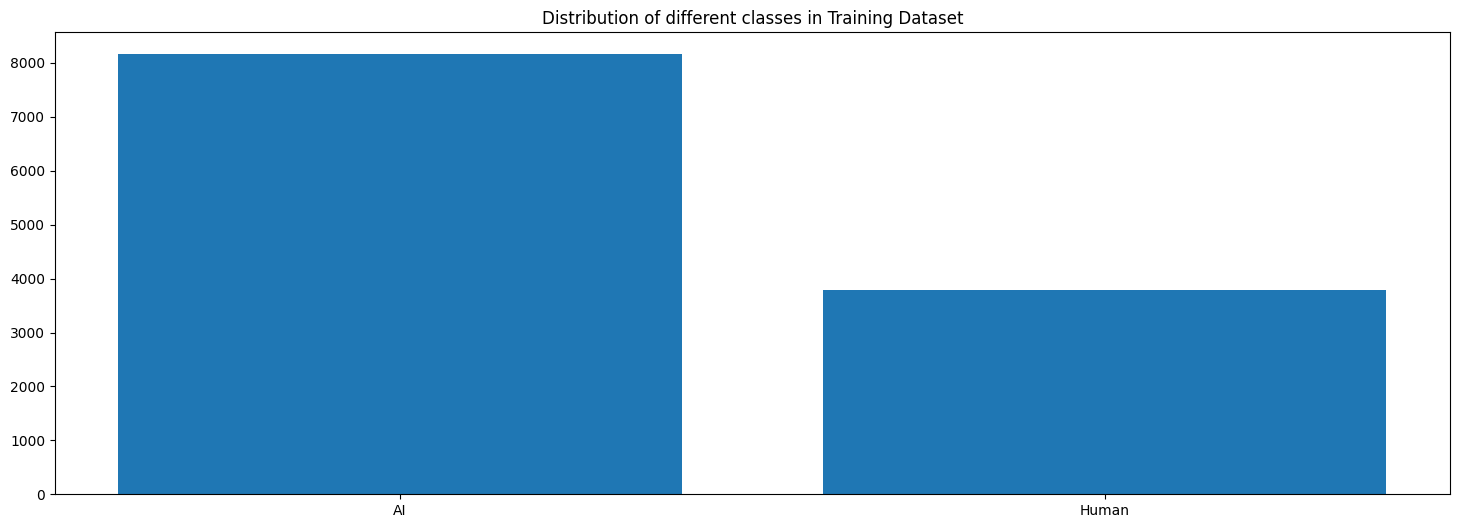




Training AI images are: 8160
Training Human images are: 3788


In [184]:
#Looking at data in training part

image_folder = ["AI" , "Human"]

nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('D:\\CS Project\\Projects\\AI projects\\Small_Classifier\\Dataused\\train\\'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(18, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()
print("\n\n")
#print no of images in each category
for i in image_folder:
    print('Training {} images are: '.format(i)+str(len(os.listdir('D:\\CS Project\\Projects\\AI projects\\Small_Classifier\\Dataused\\train\\'+i+'/'))))

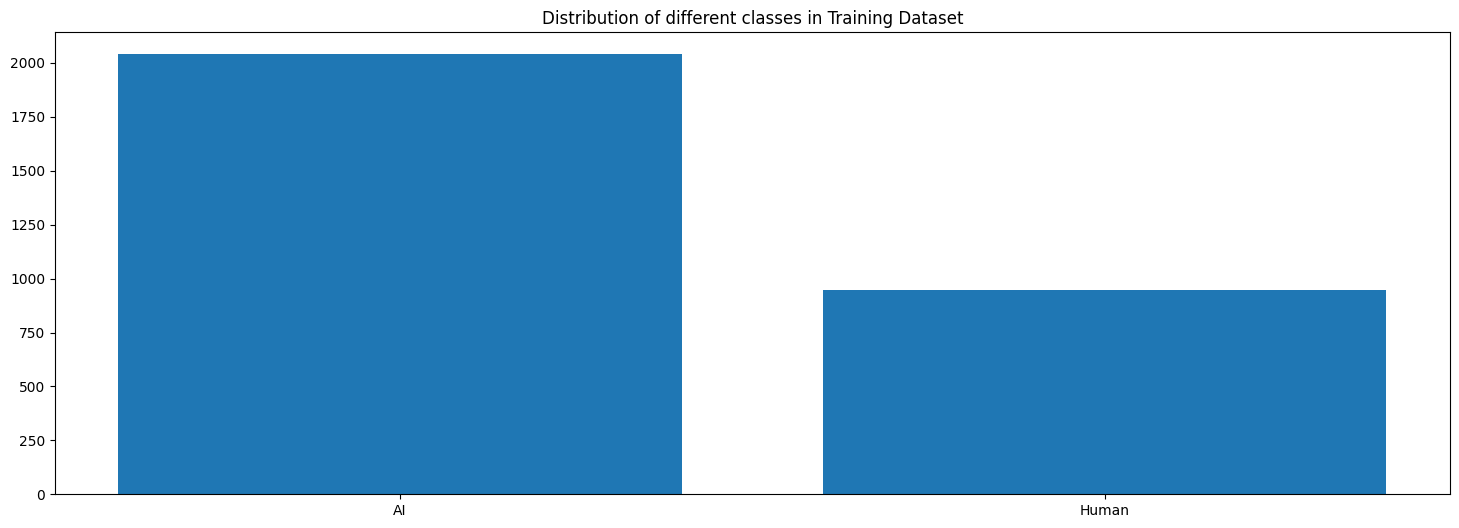




Training AI images are: 2040
Training Human images are: 948


In [185]:
#Looking at data in training part

#image_folder = ["AI_Art" , "Human_Art"]

nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('D:\\CS Project\\Projects\\AI projects\\Small_Classifier\\Dataused\\validation\\'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(18, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()
print("\n\n")
#print no of images in each category
for i in image_folder:
    print('Training {} images are: '.format(i)+str(len(os.listdir('D:\\CS Project\\Projects\\AI projects\\Small_Classifier\\Dataused\\validation\\'+i+'/'))))

Removing Dodgy images

In [ ]:
import imghdr

In [ ]:
#do not run
data_dir = 'D:\CS Project\Projects\AI projects\Art Classifier\Datasets'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
#do not run 
#It took me 17.3 mins to run this code
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Neuraal Network Training

In [186]:
#checking python version
import platform

# Check Python version
python_version = platform.python_version()
print("Python version:", python_version)
# #Check tensorflow version
try:
    import tensorflow as tf
    print("TensorFlow version:", tf.__version__)
except ImportError:
    print("TensorFlow is not installed in this environment.")

Python version: 3.10.11
TensorFlow version: 2.13.1


In [187]:
#import deep learning based modules
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [188]:
#Check if gpu is allocated
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0

In [189]:
#Limit gpu usage to reasonable level and avoid OOM errors

# List available physical GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

# Set memory growth for each GPU
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

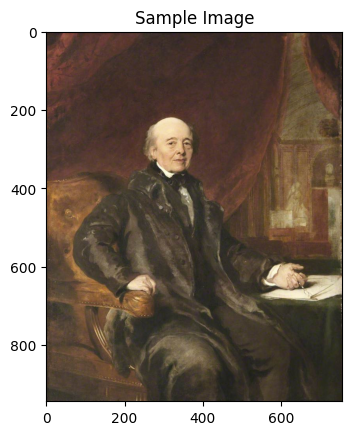

image width =757
image height = 944


In [190]:
#data visualization from directory


from PIL import Image
#Setting image height and width and batch size
img_width=256; img_height=256
Batch_size=32
# Directory containing the images either human art or ai art
image_directory = TRAINING_Human_Art_DIR  # Update with the correct path

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Choose the first image from the list
image_path = os.path.join(image_directory, image_files[0])

# Open the image using PIL
img = Image.open(image_path)

# Plot the image
plt.imshow(img)
plt.title('Sample Image')
plt.show()
#image dimensions
w,h = img.size
print(f"image width ={w}\nimage height = {h}")

In [191]:
#Setting image height and width and batch size
img_width=256; img_height=256
Batch_size=16

In [192]:
#set training directory path and create a pipeline as datagen
TRAINING_DIR = training_dir

train_datagen = ImageDataGenerator(rescale = 1. / 255,
rotation_range=30,
zoom_range=0.4,
horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
target_size=(img_height, img_width),
batch_size=Batch_size,
class_mode='categorical'
)

Found 11948 images belonging to 2 classes.


In [193]:
#indices and their classes
print(train_generator.class_indices)

#checking dimensions of images and batch size
images , labels = train_generator.next()
print("Labels shape:", labels.shape)
print("Images shape:", images.shape)

{'AI': 0, 'Human': 1}
Labels shape: (16, 2)
Images shape: (16, 256, 256, 3)


TypeError: only size-1 arrays can be converted to Python scalars

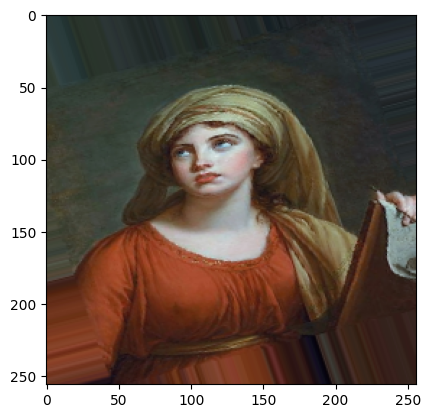

In [194]:
#plotting images from train generator

images , label = train_generator.next()

# Take the first image from the batch
image_to_plot = images[0]

# Ensure the shape of the image is valid
if len(image_to_plot.shape) == 3:  # Check if it's a valid image shape
    plt.imshow(image_to_plot)
    plt.title(f"Class {int(labels[0])}")  # Convert to integer if needed
    plt.show()
else:
    print("Invalid shape for image data")

In [195]:
#Set validation directory path and pipeline
VALIDATION_DIR = validation_dir

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
target_size=(img_height, img_width),
batch_size=Batch_size,
class_mode='categorical',
)

Found 2988 images belonging to 2 classes.


In [196]:
#indices and their classes
print(validation_generator.class_indices)

#checking dimensions of images and batch size
images , labels = validation_generator.next()
print("Labels shape:", labels.shape)
print("Images shape:", images.shape)

{'AI': 0, 'Human': 1}
Labels shape: (16, 2)
Images shape: (16, 256, 256, 3)


TypeError: only size-1 arrays can be converted to Python scalars

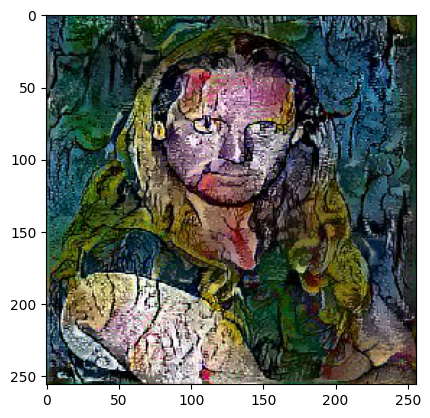

In [197]:
#plotting images from validation generator

images , label = validation_generator.next()

# Take the first image from the batch
image_to_plot = images[0]

# Ensure the shape of the image is valid
if len(image_to_plot.shape) == 3:  # Check if it's a valid image shape
    plt.imshow(image_to_plot)
    plt.title(f"Class {int(labels[0])}")  # Convert to integer if needed
    plt.show()
else:
    print("Invalid shape for image data")

In [153]:
#Preventing overfitting using Earlystopping and saving best model using ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')
# autosave best Model in location :
best_model_file = 'D:\CS Project\Projects\AI projects\Small_Classifier\Dataused\Models'
best_model_save = ModelCheckpoint(filepath = best_model_file, monitor='val_accuracy' , verbose = 1, save_best_only = True)

In [154]:
#********************Convulation Neural Network Training starts here********************
#CNN structure NOTE:last dense layer value must match number of classes,ie=2
model = Sequential([
    Conv2D(16, (3, 3), activation='relu',strides=(1, 1), padding='same', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(2, activation='sigmoid')
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_82 (Conv2D)          (None, 126, 126, 32)      4640      
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_83 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 conv2d_84 (Conv2D)          (None, 59, 59, 64)       

In [155]:
#Compiling model
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics =['accuracy'])

In [156]:
#This part is actually training of model and takes long time consider before running
#here we start with moderate epoch of 50 or 100
history = model.fit(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [early_stopping,best_model_save]
                              )

Epoch 1/10
747/747 [==============================] - ETA: 0s - loss: 0.1919 - accuracy: 0.9321
Epoch 1: val_accuracy improved from -inf to 0.96218, saving model to D:\CS Project\Projects\AI projects\Small_Classifier\Dataused\Models
INFO:tensorflow:Assets written to: D:\CS Project\Projects\AI projects\Small_Classifier\Dataused\Models\assets


INFO:tensorflow:Assets written to: D:\CS Project\Projects\AI projects\Small_Classifier\Dataused\Models\assets


747/747 [==============================] - 498s 664ms/step - loss: 0.1919 - accuracy: 0.9321 - val_loss: 0.1381 - val_accuracy: 0.9622
Epoch 2/10
747/747 [==============================] - ETA: 0s - loss: 0.0781 - accuracy: 0.9783
Epoch 2: val_accuracy improved from 0.96218 to 0.97590, saving model to D:\CS Project\Projects\AI projects\Small_Classifier\Dataused\Models
INFO:tensorflow:Assets written to: D:\CS Project\Projects\AI projects\Small_Classifier\Dataused\Models\assets


INFO:tensorflow:Assets written to: D:\CS Project\Projects\AI projects\Small_Classifier\Dataused\Models\assets


747/747 [==============================] - 517s 691ms/step - loss: 0.0781 - accuracy: 0.9783 - val_loss: 0.0721 - val_accuracy: 0.9759
Epoch 3/10
747/747 [==============================] - ETA: 0s - loss: 0.0217 - accuracy: 0.9937
Epoch 3: val_accuracy did not improve from 0.97590
747/747 [==============================] - 531s 711ms/step - loss: 0.0217 - accuracy: 0.9937 - val_loss: 0.1440 - val_accuracy: 0.9679
Epoch 4/10
747/747 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 0.9908
Epoch 4: val_accuracy did not improve from 0.97590
747/747 [==============================] - 526s 704ms/step - loss: 0.0353 - accuracy: 0.9908 - val_loss: 0.2212 - val_accuracy: 0.9461
Epoch 4: early stopping


In [157]:
#gaining metrics from history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

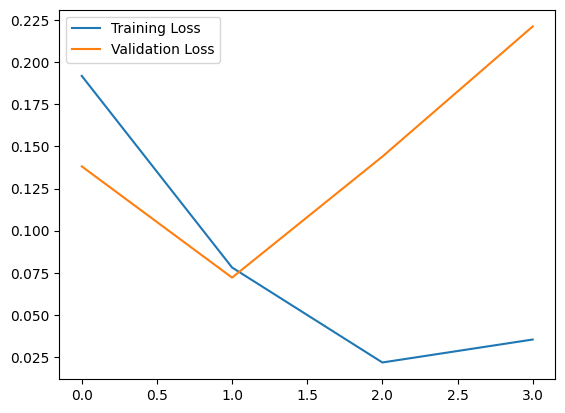

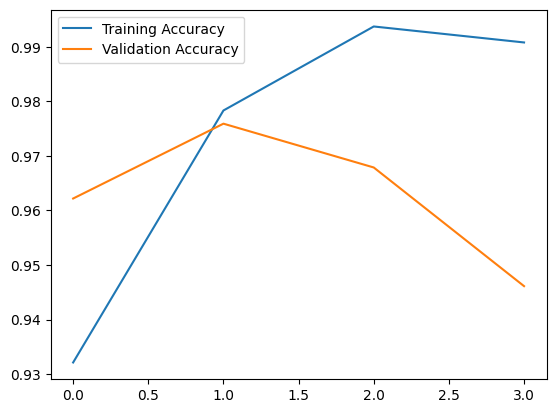

In [158]:
#plotting training and validation loss

plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.legend()
plt.show()

plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.legend()
plt.show()

Testing Model on new data

In [160]:
#loading data
from tensorflow.keras.models import load_model
model_computed = load_model('D:\CS Project\Projects\AI projects\Small_Classifier\Dataused\Models')

In [181]:
#Preprocessing data to test on
from tensorflow.keras.preprocessing import image

#set threshold
threshold = 0.5

def preprocess(test_dir):
    #for image in os.listdir(test_dir):
    #    image_path = os.path.join(test_dir,image)
    image_path = test_dir
    print(image_path)
    image_loaded = image.load_img(image_path , target_size = (img_height , img_width))
    image_array = image.img_to_array(image_loaded)
    img_array = np.expand_dims(image_array, axis=0)
    img_array /= 255.0
    prediction = model_computed.predict(img_array)
    print(prediction)
    if prediction[0][0] > threshold:
        print(f"predicted value = {prediction[0][0]} and class AI ")
        return("AI")
    else:
        print(f"predicted value = {prediction[0][0]} and class Human ")
        return("Human")


In [182]:
#call preprocess and predict
image_path = r"C:\Users\malha\Downloads\ai-generated-portraits-v0-d634yy7juj6a1.png"
answer = preprocess(image_path)

C:\Users\malha\Downloads\ai-generated-portraits-v0-d634yy7juj6a1.png
1/1 [==============================] - 0s 42ms/step
[[0.9340984  0.07616575]]
predicted value = 0.9340984225273132 and class AI 


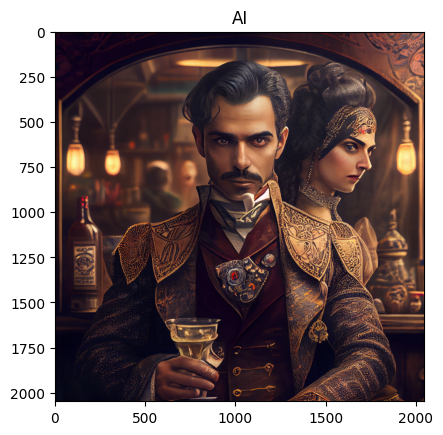

In [183]:
#plot image with output
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(answer)
plt.show()